In [83]:
from binance.client import Client
import numpy as np
import pandas as pd
import time
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [84]:
#retrieve api key from text file
a = open("api_key.txt","r")
api_key = a.read().strip()

#retrieve api secret key from text file
b = open("api_secret.txt","r")
api_secret = b.read().strip()

a.close()
b.close()

#Launching Binance API client
client = Client(api_key, api_secret)
print("Logged in")

Logged in


<h1>Question: How will we trade? </h1>
<h3>Answer: <i>Momentum</i></h3>
<img src="momentum_trading_img.jpg">

<h1> Visualizing Binance's Dataset </h1>

In [85]:
#Gets every 24h ticker data point
tickers = client.get_ticker()

#cols are the names of the dataframe's columns
cols = ["Symbol", "Current Price", "Volume", "24hr %Change", "High Price", "Low Price"]

#creating a dataframe 'df' to store all our numbers
df_assets = pd.DataFrame(columns = cols)

#enumerating variable 'i'
i = 0

for ticker in tickers:
    df_assets.loc[i] = [ticker['symbol'],float(ticker['askPrice']), float(ticker['volume']),
                        float(ticker['priceChangePercent']), float(ticker['highPrice']), 
                        float(ticker['lowPrice'])]
    i = i+1
    
df_assets.head(20)

,Symbol,Current Price,Volume,24hr %Change,High Price,Low Price
0,ETHBTC,0.074839,5.228906e+05,-0.508,0.080098,0.073428
1,LTCBTC,0.006108,5.144876e+05,-6.692,0.006594,0.006076
2,BNBBTC,0.011297,7.717128e+05,-4.667,0.012352,0.011221
3,NEOBTC,0.001890,3.074838e+05,-3.029,0.002018,0.001861
4,QTUMETH,0.005207,6.067101e+04,-9.304,0.005841,0.005126
5,EOSETH,0.002712,1.733501e+06,-8.291,0.002976,0.002636
6,SNTETH,0.000041,7.009942e+06,-4.510,0.000044,0.000039
7,BNTETH,0.001904,3.121332e+05,0.000,0.002100,0.001794
8,BCCBTC,0.000000,1.887255e+03,0.091,0.079301,0.077400
9,GASBTC,0.000241,8.635116e+05,-3.918,0.000268,0.000232


<h1> Gathering Data for Momentum Trading </h1>

In [86]:
import time 

df_momentum = pd.DataFrame(data = df_assets['Symbol'], columns = ['Symbol']) #Dataframe to hold data
total_checks = 5 #Number of market checks
time_between_checks = 5 #Number of seconds in between each market check

current_check = 0 #Enumeration variable
momentum_values_list = [] #list to keep track of momentum values

#Creating a loop to mimic time and collect data as time passes
while(current_check < total_checks):
    
    tickers = client.get_ticker() #Gets current ticker information
    temp = [] #List to keep track of momentum values for the current iteration market check
    
    for ticker in tickers:
        temp.append(float(ticker['askPrice']))
         
        
    momentum_values_list.append(temp) #Appending temp to our momentum_values_list    
    current_check = current_check + 1 #Enumerating current_check to eventually meet total_checks value
    time.sleep(time_between_checks) #Resting for designated time
    
for i in range(total_checks):
    df_momentum.insert(i+1,i+1,momentum_values_list[i])

df_momentum.head(20)

,Symbol,1,2,3,4,5
0,ETHBTC,0.074836,0.075024,0.074991,0.074974,0.075000
1,LTCBTC,0.006109,0.006111,0.006111,0.006111,0.006111
2,BNBBTC,0.011290,0.011299,0.011292,0.011282,0.011285
3,NEOBTC,0.001890,0.001889,0.001890,0.001891,0.001891
4,QTUMETH,0.005206,0.005180,0.005205,0.005206,0.005206
5,EOSETH,0.002711,0.002709,0.002708,0.002707,0.002709
6,SNTETH,0.000041,0.000041,0.000041,0.000041,0.000041
7,BNTETH,0.001904,0.001904,0.001904,0.001904,0.001904
8,BCCBTC,0.000000,0.000000,0.000000,0.000000,0.000000
9,GASBTC,0.000241,0.000241,0.000240,0.000240,0.000240


<h1> Visualizing Momentum Trading </h1>

In [87]:
#Setting up DataFrames
perc_change = ((df_momentum[total_checks] - df_momentum[1])/df_momentum[1])
df_momentum.insert(df_momentum.shape[1], "Percentage Change", perc_change)
df_pos_momentum = df_momentum[df_momentum['Percentage Change'] > 0]

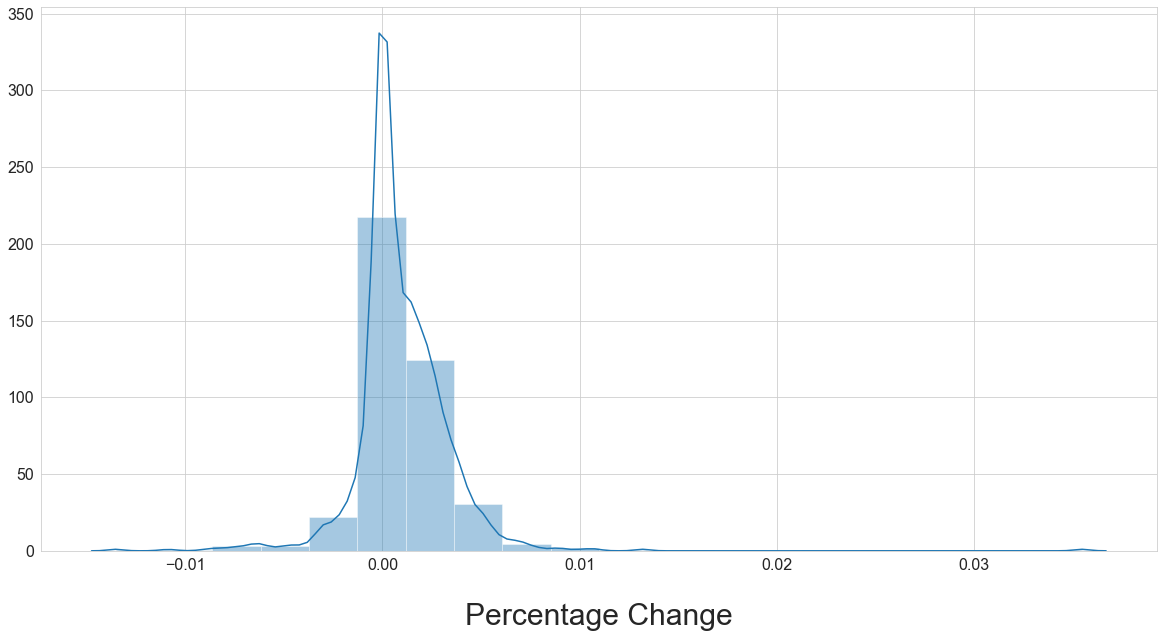

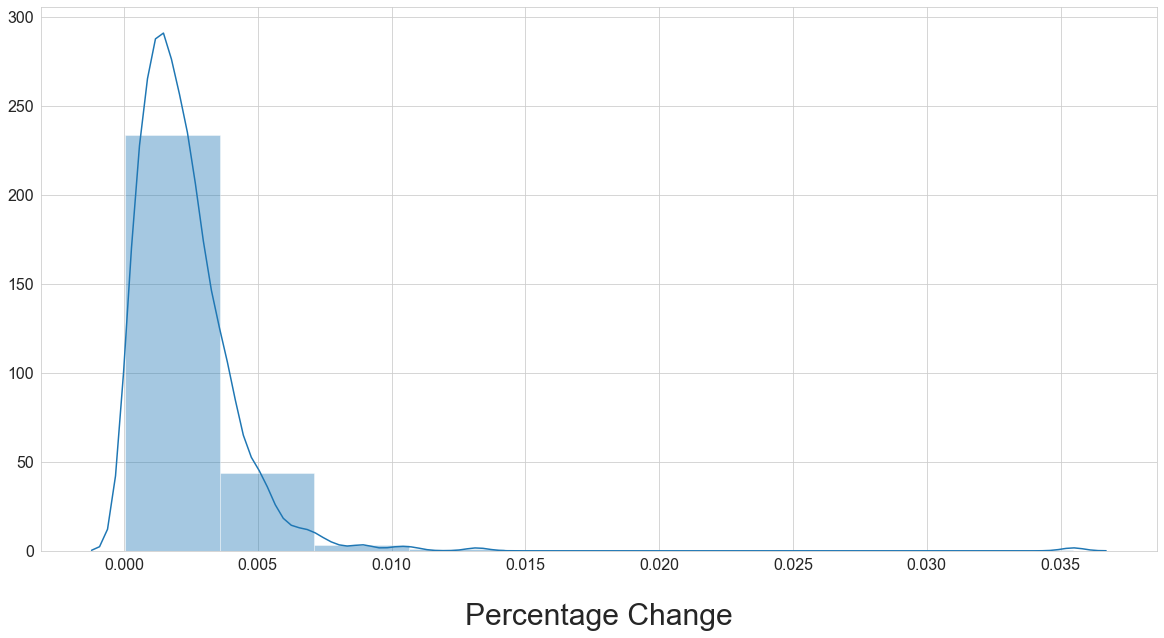

In [88]:
#Creating Vizualizations

import seaborn as sns
import matplotlib.pyplot as plt

#Full market Vizualization
plt.figure(figsize=(20,10))
plt.xlabel("Percentage Change", fontsize= 30, labelpad = 30)
sns.set_style('whitegrid')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.distplot(perc_change, bins = 20)

#Positive Moving Market Visualization
plt.figure(figsize=(20,10))
plt.xlabel("Percentage Change", fontsize= 30, labelpad = 30)
sns.set_style('whitegrid')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.distplot(df_pos_momentum['Percentage Change'], bins = 10)

<h1> My Theory </h1>
<h4> Short Term + Asset Basket + Momentum Trading + Cryptocurrency </h4>
<p> <strong>Explanation</strong>: Balancing short term risk with asset baskets, in a momentum trading context, may allow me to capture the upswing in Crypto's natural volatility! </p>


<h3> Filtering the Momentum Dataframe </h3>

In [89]:
strat_df = df_pos_momentum[df_pos_momentum['Percentage Change'] >= df_pos_momentum['Percentage Change'].quantile(.98)]

<h3> Calculating Individual Investments </h3>

In [90]:
total_investment = 10000
strat_df_invs = ((strat_df['Percentage Change']/strat_df['Percentage Change'].sum())*total_investment)

<h3> Appending Investments to Dataframe </h3>

In [91]:
strat_df.insert(strat_df.shape[1], "Investments", strat_df_invs)

<h1> Making Hypothetical Investments </h1>

for asset in strat_df:
    
    order = client.order_market_buy(
    symbol=asset['Symbol'],
    quantity=asset[total_checks]/asset[Investments])



<h1> Gathering Result Data (For Evaluation) </h1>

In [92]:
print("Now Sleeping for Designated Time")
time.sleep(total_checks * time_between_checks) #resting for the passage of time and assets to appreciate in value

symbols_strat_df = strat_df['Symbol'].values #list of symbols in the positive momentum dataframe
new_prices = [None] * len(symbols_strat_df) #List for prices of post-trade (for evaluation purposes)

tickers = client.get_ticker() #gets most up to date info
i = 0 #Enumeration variable

for ticker in tickers:
     
    if (i == len(symbols_strat_df)):
        break
    if ((ticker['symbol'] == symbols_strat_df[i])):
        new_prices[i] = float(ticker['askPrice'])
        i = i + 1

Now Sleeping for Designated Time


<h3> Appending Result Data to Dataframe </h3>

In [93]:
strat_df.insert(strat_df.shape[1], "Updated Prices", new_prices)

<h3> Calculating % Change in Value </h3>

In [94]:
strat_df_civ = (strat_df['Updated Prices'] - strat_df[total_checks])/strat_df[total_checks]

<h3> Appending Change in Investment Value to Dataframe </h3>

In [98]:
strat_df.insert(strat_df.shape[1], "Change in Investment Value", strat_df_civ)

<h1> How did we do? </h1>

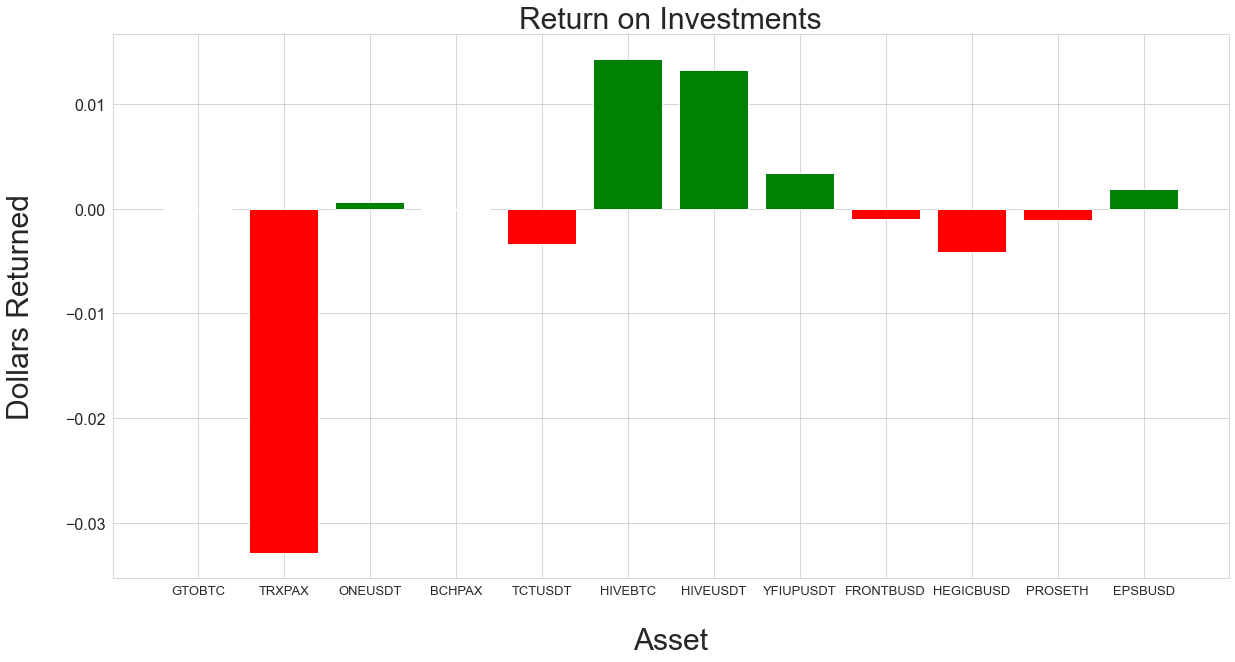

In [112]:
fig = plt.figure(figsize=(20, 10))
positive = strat_df['Change in Investment Value'] > 0 #Filtering for positive values


plt.bar(strat_df['Symbol'], strat_df['Change in Investment Value'], 
        color=positive.map({True: 'g', False: 'r'})) #Change color based on whether investment is green or red
plt.xlabel("Asset", fontsize= 30, labelpad = 30)
plt.ylabel("Dollars Returned", fontsize= 30, labelpad = 30)
plt.title("Return on Investments", fontsize= 30)
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.show()

<h1> Let's <em>combine</em> all of this - on to the next Jupyter! </h1>